In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook 
import math

# ignore Kivy's log
import os
os.environ["KIVY_NO_CONSOLELOG"] = "1"

# kivy for input
from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '800')
Config.set('graphics', 'height', '800')
from kivy.interactive import InteractiveLauncher
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.graphics import Line



In [ ]:
# settings
samplePercentage = 1 #percentage

In [2]:
#to save the points touched as x + iy
pointsTouched = []

class DrawInput(Widget):

    def on_touch_down(self, touch):    
        
        global pointsTouched # not a good method, have to change
        with self.canvas: 
            touch.ud["line"] = Line(points=(touch.x, touch.y))
            pointsTouched += [int(touch.x/2)+int(touch.y/2)*1j]

    def on_touch_move(self, touch):
        
        global pointsTouched
        touch.ud["line"].points += (touch.x, touch.y)
        pointsTouched += [int(touch.x/2) + int(touch.y/2)*1j]
        
class drawingBoard(App):

    def build(self):
        return DrawInput()

drawingBoard().run()

In [7]:
# generate complex points sampled numpy array
sampledPoints = np.asarray(pointsTouched)[::int(1/samplePercentage)]

#to calculate DFT
N = len(sampledPoints)
points_fft = np.fft.fft(sampledPoints, N)

#inverse fourier array
generated_function = [0 for i in range(N)]

#calculates inverse fourier from 0 -> N
for tau in range(N):
    for k in range(len(points_fft)):
        # inverse fourier transform
        generated_function[tau] += points_fft[k]*(math.e**(1j*2*math.pi*k*tau/N))

generated_function = [x/t for x in generated_function]

<IPython.core.display.Javascript object>


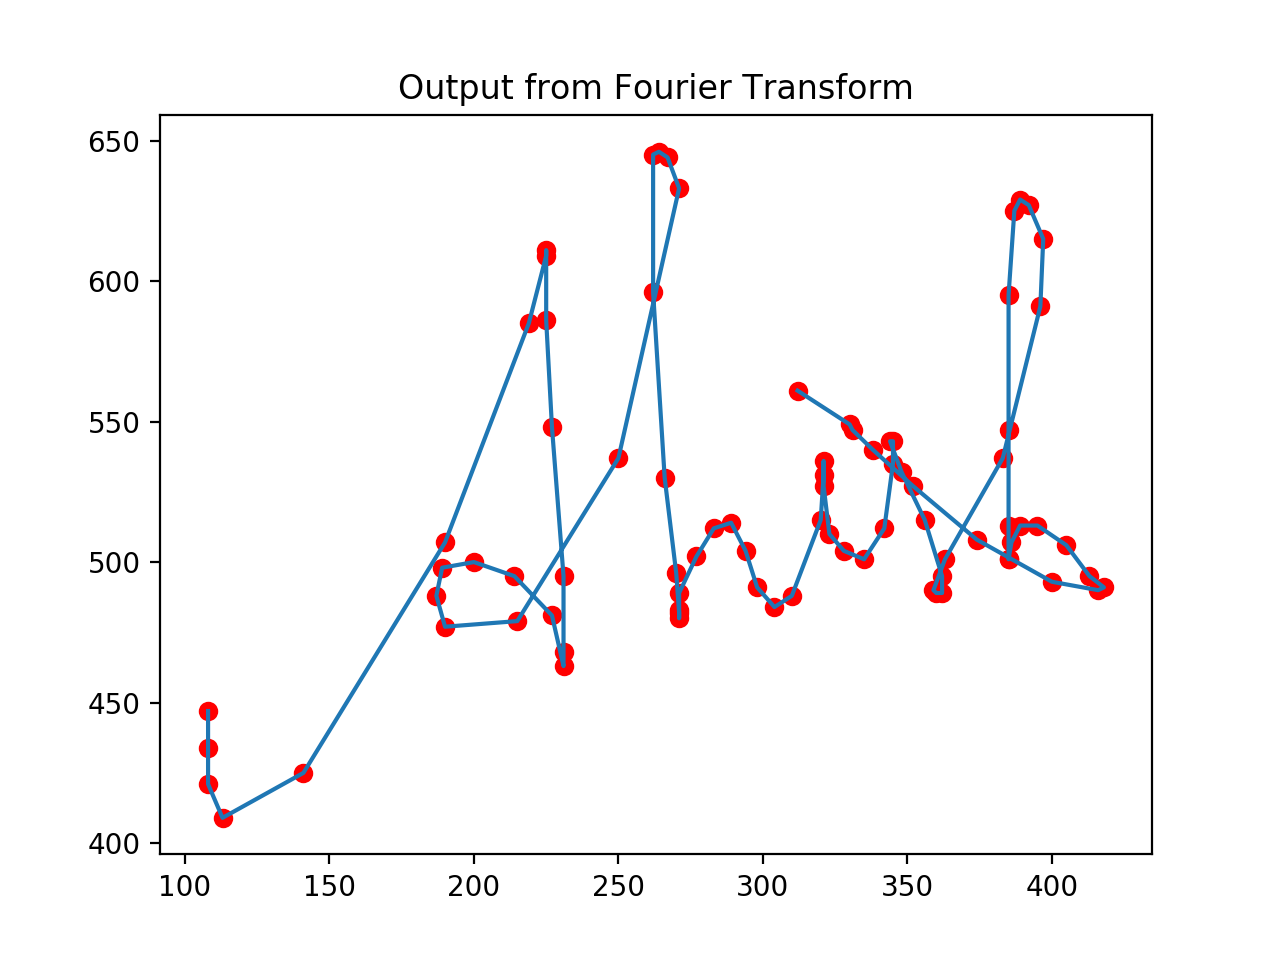

In [8]:
real = list(map(lambda x: x.real, generated_function))
imag = list(map(lambda x: x.imag, generated_function))

plt.title("Output from Fourier Transform")
plt.plot(real, imag)
plt.show()

In [9]:
plt.scatter(real, imag, color='red')
plt.show()

In [10]:
# animation
abs_fft = np.absolute(points_fft)/N
phase_fft = np.angle(points_fft)

n_circles = len(points_fft)



In [11]:
def pos_at(time, abs_fft, phase_fft):
    
    circlePos = [(0,0)]
    loc_x = 0
    loc_y = 0
    w = 2*math.pi/N
    
    for i in range(len(points_fft)):

        loc_x += abs_fft[i]*math.cos((i)*w*time + phase_fft[i])
        loc_y += abs_fft[i]*math.sin((i)*w*time + phase_fft[i])

        circlePos += [(loc_x, loc_y)]
    
    return circlePos

In [12]:
flag = 0

<IPython.core.display.Javascript object>


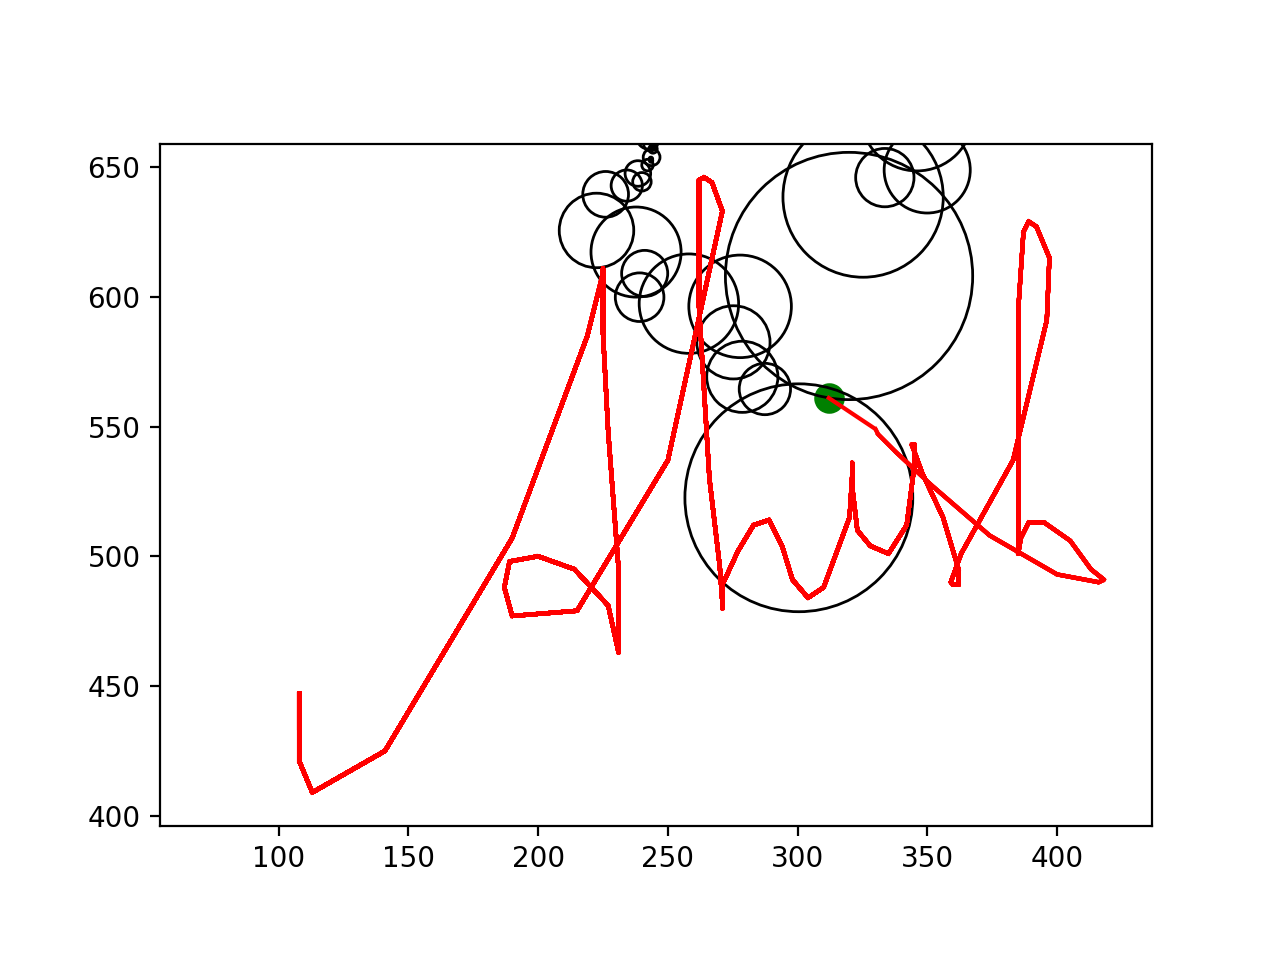

In [13]:
fig = plt.figure()
# ax = plt.axes(xLim=(-100, 800), yLim=(-100,800))
ax = plt.axes()

initCirclesPos = pos_at(0, abs_fft, phase_fft)
circles = []
for i in range(n_circles):
    circles += [plt.Circle(initCirclesPos[i], abs_fft[i], fill=False)]

# scat = ax.scatter([], [])

    
def init():
    
    initCirclesPos = pos_at(0, abs_fft, phase_fft)
   
    for i in range(n_circles):
        if i:
            circles[i].center = initCirclesPos[i]
            ax.add_patch(circles[i])
    
    global scat 
    scat = ax.scatter(real[0], imag[0], lw=5, color='g')
        
    return [circles]

def animate(i):
 
    newCirclesPos = pos_at(i, abs_fft, phase_fft)
    for m in range(n_circles):
        if m:
            circles[m].center = newCirclesPos[m]
    
    ax.plot(real[:i+1], imag[:i+1], color='r')
#     ax.fill(range(real[i+1], real[i+1] + 10), range(imag[i+1], imag[i+1]+10), 'g')
    ax.axis("scaled") 
    
    global scat
    scat.remove()
    scat = ax.scatter(real[i], imag[i], lw=5, color='g')
    
    return [circles]

anim=FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=False, repeat=False)


plt.show()
        
        

In [ ]:
# Uncomment to save the animation

# import matplotlib.animation as animation

# Writer = animation.writers['ffmpeg']
# writer = Writer(metadata=dict(artist='Ahish'), bitrate=1800)
# anim.save("current.mp4", writer=writer)